In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [ ]:
df = pd.read_csv('F0001CH2.CSV', delimiter=',', header=None).drop([0,1,2,5], axis=1)

In [ ]:
df.columns = range(df.columns.size)
df.head()

,0,1
0,-0.000002,-0.16
1,-0.000002,-0.08
2,-0.000002,0.00
3,-0.000002,-0.08
4,-0.000002,-0.08


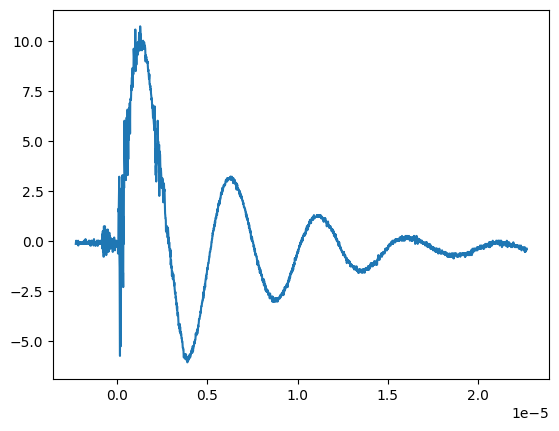

In [ ]:
plt.plot(df.iloc[:,0], df.iloc[:,1])

In [ ]:
df.iloc[:, 1] = savgol_filter(df.iloc[:, 1], 101, 2)

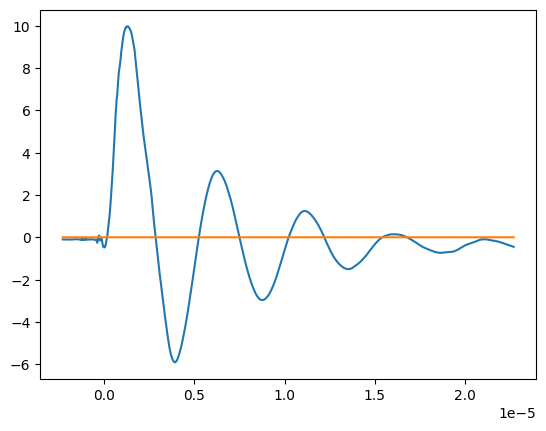

In [ ]:
df.iloc[:,1] = df.iloc[:,1]
plt.plot(df.iloc[:,0], df.iloc[:,1])
plt.plot(df.iloc[:,0], np.zeros(df.shape[0]))

In [ ]:
granici = pd.array([0.0, 0.25, 0.5, 0.75, 1.0, 1.25]) * 1e-5

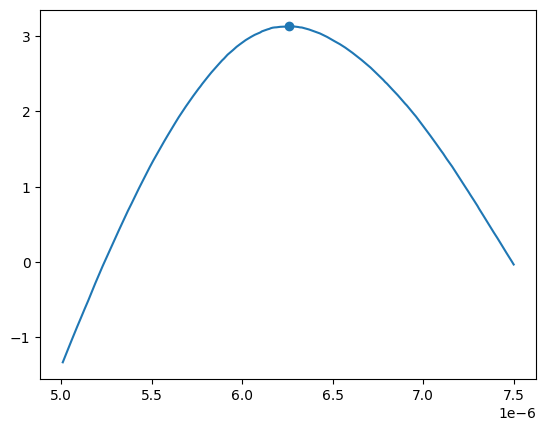

In [ ]:
P = df[(df.iloc[:,0] > granici[2]) * (df.iloc[:,0] < granici[3])].iloc[:,:]

plt.plot(P[0], P[1])
plt.scatter(P[abs(P[1]) == abs(P[1]).max()][0], P[abs(P[1]) == abs(P[1]).max()][1])

In [ ]:
P = df[(df.iloc[:,0] > granici[0]) * (df.iloc[:,0] < granici[1])].iloc[:,:]
maxes = P[P[1] == P[1].max()].iloc[0,:].copy()

for i in np.arange(1, granici.shape[0]-1):
  P = df[(df.iloc[:,0] > granici[i]) * (df.iloc[:,0] < granici[i+1])].iloc[:,:]

  maxes = pd.concat([maxes, P[abs(P[1]) == abs(P[1]).max()].iloc[0,:]], axis=1)

maxes

,362,622,856,1108,1342
0,0.000001,0.000004,0.000006,0.000009,0.000011
1,9.962667,-5.904271,3.130360,-2.964280,1.246869


In [ ]:
maxes.iloc[1,:] = abs(maxes.iloc[1,:])

In [ ]:
for i in np.arange(4):
  print(maxes.iloc[0,i+1] - maxes.iloc[0,i])

2.5999999999999997e-06
2.3400000000000005e-06
2.5200000000000004e-06
2.3399999999999996e-06


In [ ]:
T = (maxes.iloc[0,2] - maxes.iloc[0,0]) + 0.1 * 10**(-6) # Период
print("T =", T, "[с]")

T = 5.04e-06 [с]


In [ ]:
sum = 0
for i in np.arange(3):
  sum = sum + np.log(maxes.iloc[1,i]/maxes.iloc[1,i+2])

betta = 4/(3*T*sum) # [1/с]
print("betta =", betta,"[1/с]")

betta = 95600.39171451727 [1/с]


In [ ]:
C = 12e-6 # [Ф]

L = 1/(((2*np.pi/T)**2 + betta**2)*C) # [Гн]
print("L =", L, "[Гн]")

L = 5.330570156771341e-08 [Гн]


In [ ]:
R = 2*L*betta # [Ом]
print("R =", R, "[Ом]")

R = 0.01019209190098112 [Ом]


In [ ]:
print(2*(L/C)**0.5) # для сравнения

0.13329878915143153


In [ ]:
U0 = 25e3 # [В]

w = 2*np.pi/T # [рад/с]

Im = U0/(w*L) # [A]

print("Im =", Im, "[А]")

Im = 376198.4598233856 [А]


In [ ]:
d = 10e-3 # [м]

results = pd.DataFrame({'n, ч/м^3': [], 'T, эВ': [], 'Vz, м/с': []})
results

,"n, ч/м^3","T, эВ","Vz, м/с"


In [ ]:
Ne = pd.read_fwf("NE.dat", widths=[12]*161, header=None)

In [ ]:
dn = Ne.iloc[107, 80:88]

dr = d/2/len(dn)
r = 0
sum = 0
for n in dn:
  r = r + dr
  sum = sum + 2*np.pi*r*dr*n

n = sum/(np.pi*r*r)
print("Средняя плотность на пластине:", n, "[м^-3]")

Средняя плотность на пластине: 4189875000000000.0 [м^-3]


In [ ]:
#Ne.to_excel("output.xlsx")

In [ ]:
Te = pd.read_fwf("TE.dat", widths=[12]*161, header=None)

In [ ]:
dt = Te.iloc[107, 80:88]

dr = d/2/len(dn)
r = 0
sum = 0
for t in dt:
  r = r + dr
  sum = sum + 2*np.pi*r*dr*t

t = sum/(np.pi*r*r)
print("Средняя температура на пластине:", t, "[эВ]")

Средняя температура на пластине: 399.025 [эВ]


In [ ]:
#Te.to_excel("output.xlsx")

In [ ]:
Ve = pd.read_fwf("ZV.dat", widths=[12]*161, header=None)

In [ ]:
dv = Ve.iloc[107, 80:88]

dr = d/2/len(dn)
r = 0
sum = 0
for v in dv:
  r = r + dr
  sum = sum + 2*np.pi*r*dr*v

v = sum/(np.pi*r*r)
print("Средняя скорость по z на пластине:", v, "[м/с]")

Средняя скорость по z на пластине: -35818.75 [м/с]


In [ ]:
#Ve.to_excel("output.xlsx")

In [ ]:
results = pd.concat([results, pd.DataFrame({'n, ч/м^3': [n], 'T, эВ': [t], 'Vz, м/с': [v]})], ignore_index = True)
results

,"n, ч/м^3","T, эВ","Vz, м/с"
0,3.854687e+17,741.893750,1.773656e+06
1,1.764431e+17,432.440625,-3.760575e+05
2,5.445281e+16,196.906250,-5.405250e+05
3,7.657281e+16,495.759375,2.518069e+06
4,4.566625e+16,421.703125,6.450187e+04
5,2.107212e+16,445.712500,-4.902781e+05
6,1.466494e+16,730.990625,6.457844e+04
7,1.154816e+16,596.446875,1.939844e+05


In [ ]:
results.to_excel("results.xlsx")